In [126]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
# reading the csv file
carprice_data = pd.read_csv(r"C:\Users\DELL\Desktop\carprice.csv")

# to check if there is any missing values
print(carprice_data.isna().sum())

print(carprice_data)
    

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64
     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      g

In [128]:
carprice_data = pd.get_dummies(carprice_data, columns=["doornumber","cylindernumber","carbody","aspiration","drivewheel","fuelsystem","enginetype","fueltype"])

In [129]:
carprice_data.drop(["car_ID","enginelocation","cylindernumber_three","cylindernumber_twelve","cylindernumber_two","cylindernumber_eight","carbody_hardtop","carbody_wagon","CarName","symboling"], axis=1, inplace=True)

In [130]:
print(carprice_data)



     wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0         88.6      168.8      64.1       48.8        2548         130   
1         88.6      168.8      64.1       48.8        2548         130   
2         94.5      171.2      65.5       52.4        2823         152   
3         99.8      176.6      66.2       54.3        2337         109   
4         99.4      176.6      66.4       54.3        2824         136   
..         ...        ...       ...        ...         ...         ...   
200      109.1      188.8      68.9       55.5        2952         141   
201      109.1      188.8      68.8       55.5        3049         141   
202      109.1      188.8      68.9       55.5        3012         173   
203      109.1      188.8      68.9       55.5        3217         145   
204      109.1      188.8      68.9       55.5        3062         141   

     boreratio  stroke  compressionratio  horsepower  ...  fuelsystem_spfi  \
0         3.47    2.68           

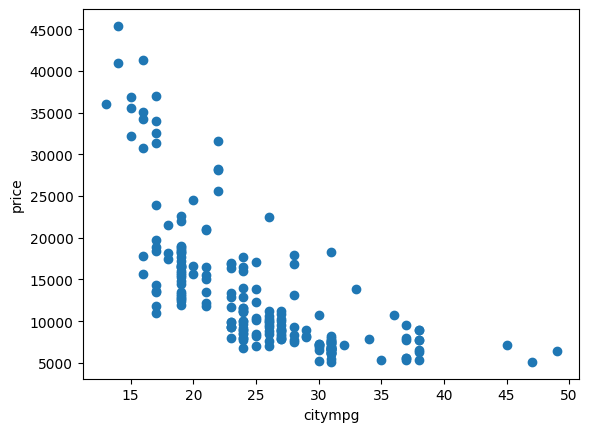

In [131]:
plt.scatter(carprice_data["citympg"], carprice_data["price"])
plt.xlabel("citympg")
plt.ylabel("price")
plt.show()

In [132]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()

num_data=carprice_data.select_dtypes(include=np.number).columns.tolist()
num_data.remove("price")

carprice_data[num_data] = scaler.fit_transform(carprice_data[num_data])


In [133]:
print(carprice_data)


     wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0     0.058309   0.413433  0.316667   0.083333    0.411171    0.260377   
1     0.058309   0.413433  0.316667   0.083333    0.411171    0.260377   
2     0.230321   0.449254  0.433333   0.383333    0.517843    0.343396   
3     0.384840   0.529851  0.491667   0.541667    0.329325    0.181132   
4     0.373178   0.529851  0.508333   0.541667    0.518231    0.283019   
..         ...        ...       ...        ...         ...         ...   
200   0.655977   0.711940  0.716667   0.641667    0.567882    0.301887   
201   0.655977   0.711940  0.708333   0.641667    0.605508    0.301887   
202   0.655977   0.711940  0.716667   0.641667    0.591156    0.422642   
203   0.655977   0.711940  0.716667   0.641667    0.670675    0.316981   
204   0.655977   0.711940  0.716667   0.641667    0.610551    0.301887   

     boreratio    stroke  compressionratio  horsepower  ...  fuelsystem_spfi  \
0     0.664286  0.290476       

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE

X_train, X_test, Y_train, Y_test = train_test_split(carprice_data.drop("price", axis=1), carprice_data["price"], test_size=0.2, random_state=0)

lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=8)
rfe.fit(X_train, Y_train)

print("8 features:", carprice_data.drop("price", axis=1).columns[rfe.support_])
print(carprice_data.columns.to_list())
carprice_data.drop(["wheelbase","carlength","carwidth","carheight","enginesize","boreratio","stroke","compressionratio","peakrpm","citympg",
                     "doornumber_four", "doornumber_two","carbody_convertible",
                    "carbody_hatchback", "carbody_sedan", "aspiration_std", "aspiration_turbo", "drivewheel_4wd", "drivewheel_fwd", "drivewheel_rwd",
                    "fuelsystem_1bbl", "fuelsystem_2bbl", "fuelsystem_4bbl", "fuelsystem_idi", "fuelsystem_mfi", "fuelsystem_mpfi",
                    "fuelsystem_spdi", "fuelsystem_spfi", "enginetype_dohc", "enginetype_dohcv", "enginetype_l",
                    "enginetype_ohc", "enginetype_ohcf", "fueltype_diesel", "fueltype_gas"], axis=1, inplace=True)
lr.fit(X_train,Y_train)
print(carprice_data.columns.to_list())

lr_pred = lr.predict(X_test)
lr_rmse = mean_squared_error(Y_test, lr_pred, squared=False)
print("linear regression rmse:", lr_rmse)

8 features: Index(['curbweight', 'horsepower', 'highwaympg', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'enginetype_ohcv',
       'enginetype_rotor'],
      dtype='object')
['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'doornumber_four', 'doornumber_two', 'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six', 'carbody_convertible', 'carbody_hatchback', 'carbody_sedan', 'aspiration_std', 'aspiration_turbo', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd', 'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'fueltype_diesel', 'fueltype_gas']
['curbweight', 'horsepower', 'highwaymp

In [143]:
lasso = Lasso(alpha=5.0)


lasso.fit(X_train,Y_train)

lasso_pred = lasso.predict(X_test)
lasso_rmse = mean_squared_error(Y_test, lasso_pred, squared=False)
print("lasso regression rmse:", lasso_rmse)

lasso regression rmse: 3354.5684047338937


In [136]:
ridge = Ridge()
ridge.fit(X_train,Y_train)

ridge_pred = ridge.predict(X_test)
ridge_rmse = mean_squared_error(Y_test, ridge_pred, squared=False)
print("ridge regression rmse:", ridge_rmse)

ridge regression rmse: 3782.1236865534283


In [137]:
en = ElasticNet()
en.fit(X_train,Y_train)

en_pred = en.predict(X_test)
en_rmse = mean_squared_error(Y_test, en_pred, squared=False)
print("elasticnet regression rmse:", en_rmse)

elasticnet regression rmse: 5978.48544975427
